In [16]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
from sklearn.preprocessing import scale, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, auc,confusion_matrix
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data set is the data set were we have converted categorical values to numerical values
%run load.py
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,avg_hour_project
0,0.0,0.0,2,0,3,0,1,0,0,0,1.0
1,2.0,2.0,5,2,6,0,1,0,0,1,0.0
2,0.0,2.0,7,2,4,0,1,0,0,1,0.0
3,2.0,2.0,5,1,5,0,1,0,0,0,0.0
4,0.0,0.0,2,0,3,0,1,0,0,0,1.0


In [3]:
labels = data.left
ml_data = data.drop('left', axis = 1)

Spliting dataset into training and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(ml_data, labels, test_size = 0.2, random_state = 25)

# Classification Models

Model: Logistic Regression

In [45]:
#Logistic Regression:
lgr = LogisticRegression(random_state = 42)
lgr.fit(X_train, y_train)

y_probas_logi = cross_val_predict(lgr, X_train, y_train, cv=3,
method="predict_proba")

y_score = lgr.fit(X_train, y_train).decision_function(X_test)
train_score_lgr = lgr.score(X_train, y_train)
test_score_lgr = lgr.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_lgr))
print("Test score: {:.5f}".format(test_score_lgr))

Training score: 0.76372
Test score: 0.76410


Plot ROC Curve of Logistic Regression

In [46]:
#Receiver operating characteristic(ROC)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

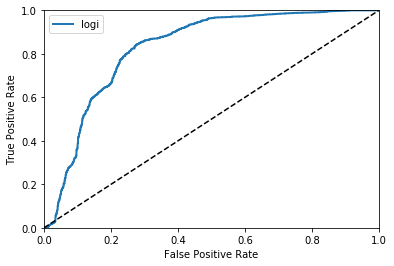

In [47]:
y_scores_logi = y_probas_logi[:, 1] # score = proba of positive class
fpr, tpr, thresholds_logi = roc_curve(y_train,y_scores_logi)

plot_roc_curve(fpr, tpr, "logi")
plt.legend(loc="bottom right")
plt.show()

Model: k-Nearest-Neighbors

In [49]:
#k-Nearest-Neighbors
knn = KNeighborsClassifier(n_neighbors=2)
parameters = {'n_neighbors':[2,3,4,5,6,7,8,9,10], 'leaf_size':[20,30,40]}
clf = GridSearchCV(knn, parameters, cv = 5)
clf.fit(X_train, y_train)

y_probas_knn = cross_val_predict(knn, X_train, y_train, cv=3,
method="predict_proba")

train_score_knn = clf.score(X_train, y_train)
test_score_knn = clf.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_knn))
print("Test score: {:.5f}".format(test_score_knn))

Training score: 0.97427
Test score: 0.95316


Plot ROC Curve of k-Nearest-Neighbors

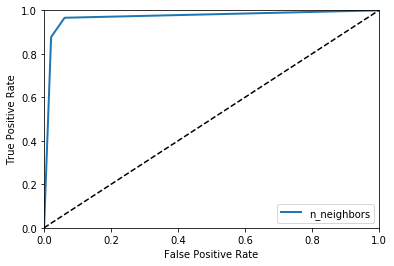

In [51]:
y_scores_knn = y_probas_knn[:, 1] # score = proba of positive class
fpr, tpr, thresholds_knn = roc_curve(y_train,y_scores_knn)

plot_roc_curve(fpr, tpr, "n_neighbors")
plt.legend(loc="bottom right")
plt.show()

Model: DecisionTree

In [52]:
dt = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2', None]}

y_probas_dt = cross_val_predict(dt, X_train, y_train, cv=3,
method="predict_proba")

clf = GridSearchCV(dt, parameters, cv = 5)
clf.fit(X_train, y_train)
train_score_dt = clf.score(X_train, y_train)
test_score_dt = clf.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_dt))
print("Test score: {:.5f}".format(test_score_dt))

Training score: 0.99068
Test score: 0.96376


Plot ROC Curve of DecisionTree

In [53]:
y_scores_dt = y_probas_dt[:, 1] # score = proba of positive class
fpr, tpr, thresholds_forest = roc_curve(y_train,y_scores_dt)

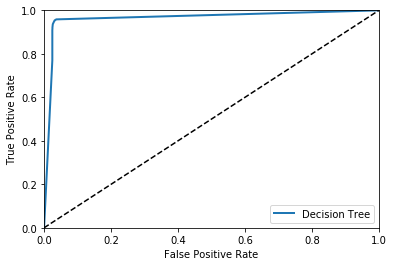

In [54]:
plot_roc_curve(fpr, tpr, "Decision Tree")
plt.legend(loc="bottom right")
plt.show()

Model: Random Forest

In [55]:
#RandomForest:
rfc = RandomForestClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'n_estimators': range(5,15),
              'max_features': ['auto', 'sqrt', 'log2', None],
              'bootstrap': [True, False], 'warm_start': [True, False]}
clf = GridSearchCV(rfc, parameters, cv = 5)
clf.fit(X_train, y_train)
train_score_rfc = clf.score(X_train, y_train)
test_score_rfc = clf.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_rfc))
print("Test score: {:.5f}".format(test_score_rfc))

Training score: 0.98974
Test score: 0.97368


In [56]:
#forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rfc, X_train, y_train, cv=3,
method="predict_proba")

Plot ROC Curve of Random Forest

In [57]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

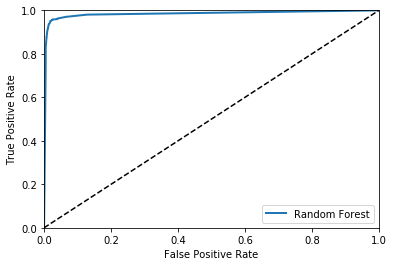

In [58]:
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [43]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'kNN', 'Decision Tree', 'Random Forest'],
        'Training_Score' : [train_score_lgr, train_score_knn, train_score_dt, train_score_rfc],
        'Testing_Score'  : [test_score_lgr, test_score_knn, test_score_dt, test_score_rfc]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Testing_Score,Training_Score
4,Random Forest,0.971624,0.989998
3,Decision Tree,0.962735,0.990682
1,SVM,0.961368,0.966319
2,kNN,0.953162,0.974269
0,Logistic Regression,0.764103,0.763720


# Final Thoughts:
Logistic Regression is one of the basic classification models that usually be used first to see the results;
Random Forest performs best among all the classification models;
The scores and ROC curves indicate that all the models (except logistic regression) did a excellent job in predicting.